### Generate damaged custom MNIST dataset

이미지 연산을 이용한 custom MNIST 데이터셋 생성하기

1. Load texture image (no background)
2. Crop texture image
3. Loading digits image
4. Crop digits
5. Image operation
6. Loop

In [102]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Load texture png

투명 텍스처 이미지 불러오기

(600, 600)


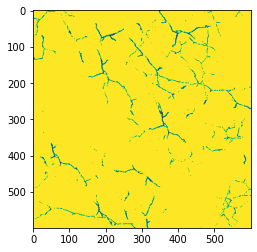

In [117]:
path = 'img/crack_texture.png'
mask = cv2.imread(path, 0)
mask = mask[0:600, 200:800]
plt.imshow(mask)
print(mask.shape)

Crop texture image size (30, 30)

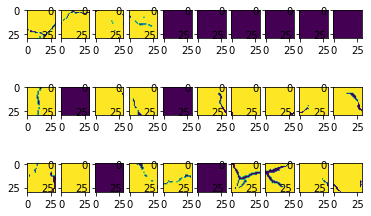

In [119]:
# show example texture image
size = 30
for i in range(3):
    y = i * size
    for j in range(10):
        x = j * size
        crop = mask[y:y+size, x:x+size]
        plt.subplot(3, 10, (i*10) + j + 1)
        plt.imshow(crop)
plt.show()

Load digit image

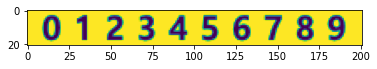

In [114]:
path = 'img/font_13.png'
src = cv2.imread(path, 0)
plt.imshow(src)

Crop digits

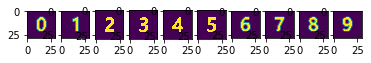

In [120]:
# threshold
_, dst = cv2.threshold(src, 127, 255, cv2.THRESH_OTSU)
dst_inv = 255 - dst  # inverse

# findcontours
contours, _ = cv2.findContours(dst_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
digits_coordinate = []
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    digits_coordinate.append((x, y, w, h))

# sort by x
digits_coordinate.sort(key=lambda x:x[0])

# Add border on digits image before
digits_img = []
for i, d in enumerate(digits_coordinate):
    x, y, w, h = d
    digit = dst_inv[y:y+h, x:x+w]
    # calc padding
    h_pad = (size - h) >> 1
    w_pad = (size - w) >> 1
    # add white border
    border = cv2.copyMakeBorder(digit, h_pad, h_pad, w_pad, w_pad, cv2.BORDER_CONSTANT, None, 0)
    digits_img.append(border)
    plt.subplot(1, 10, i+1)
    plt.imshow(border)

Add mask on digits image

- numpy로 계산하면 255를 넘는 값은 다시 0부터 카운팅 (오버플로)

- cv2.add() 를 사용하면 255를 넘는 값 모든 값은 255로 반환

- cv2.subtract()는 반대로 0보다 작은 값은 0으로 반환

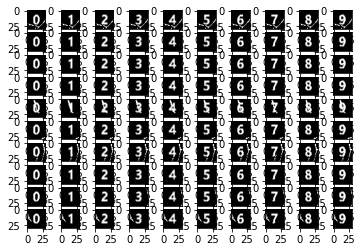

In [134]:
# test
digits_len = len(digits_img)
cnt = 10 # MAX VAL =  600/size
for i in range(cnt):
    p = i * size
    m = mask[p:p+size, p:p+size] # crop
    for j in range(digits_len):
        # add operation
        resized = cv2.resize(digits_img[j], (30, 30))
        masked = cv2.add((255 - m), resized) # inverse
        # show
        num = i * digits_len + j + 1
        # save
        # cv2.imwrite('output/img_'+str(num)+'.png', masked)
        plt.subplot(cnt, digits_len, num)
        plt.imshow(masked, cmap='gray')